<a href="https://colab.research.google.com/github/Sophiajackrich/Bachelors_Final_Project/blob/main/Natural_Disasters_in_Nigeria_(Flood_case_study).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

In [ ]:
# Import Ecel file and view sheet names
file_path = "C:/datasets/public_emdat_custom_request_2023-09-30_05b7058c-b4ee-4661-a3dd-6f9810b6ddaf.xlsx"
data = pd.ExcelFile(file_path)
data.sheet_names

['EM-DAT Data', 'EM-DAT Info']

In [ ]:
# Parese the first sheet to a dataframe and view head
df1 = data.parse('EM-DAT Data')
df1.head()

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,1900-9002-CPV,Yes,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,CPV,...,NaN,NaN,NaN,NaN,NaN,NaN,2.842847,NaN,2006-12-01,2023-09-25
1,1901-0001-UGA,Yes,nat-bio-epi-dis,Natural,Biological,Epidemic,Infectious disease (General),NaN,NaN,UGA,...,NaN,NaN,NaN,NaN,NaN,NaN,2.842847,NaN,2003-07-01,2023-09-25
2,1903-0012-COM,Yes,nat-geo-vol-ash,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Mount Karthala,COM,...,NaN,NaN,NaN,NaN,NaN,NaN,3.070275,NaN,2005-04-28,2023-09-25
3,1903-9001-NER,Yes,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,NER,...,NaN,NaN,NaN,NaN,NaN,NaN,3.070275,NaN,2006-02-13,2023-09-25
4,1906-9025-NER,Yes,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,NER,...,NaN,NaN,NaN,NaN,NaN,NaN,3.070275,NaN,2006-02-13,2023-09-25


In [ ]:
df1.columns

Index(['DisNo.', 'Historic', 'Classification Key', 'Disaster Group',
       'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype',
       'External IDs', 'Event Name', 'ISO', 'Country', 'Subregion', 'Region',
       'Location', 'Origin', 'Associated Types', 'OFDA Response', 'Appeal',
       'Declaration', 'AID Contribution ('000 US$)', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damage ('000 US$)', 'Insured Damage, Adjusted ('000 US$)',
       'Total Damage ('000 US$)', 'Total Damage, Adjusted ('000 US$)', 'CPI',
       'Admin Units', 'Entry Date', 'Last Update'],
      dtype='object')

In [ ]:
# Parse the second sheet to dataframe and view head
df2 = data.parse('EM-DAT Info')
df2.head(10)

,Source:,"EM-DAT, CRED / UCLouvain, Brussels, Belgium"
0,NaN,https://www.emdat.be
1,Glossary:,https://doc.emdat.be/docs/data-structure-and-c...
2,Version:,2023-09-26
3,File creation:,"Sat, 30 Sep 2023 16:50:44 UTC"
4,Table type:,public_emdat_custom_request
5,# of records:,3099


In [ ]:
# Filter out Flood cases in Africa
Africa_flood = df1[(df1['Disaster Type']=='Flood')]


In [ ]:
# Check unique instances of Disasters in dataset
df1['Disaster Type'].unique()

array(['Drought', 'Epidemic', 'Volcanic activity', 'Earthquake',
       'Infestation', 'Flood', 'Storm', 'Mass movement (wet)', 'Wildfire',
       'Mass movement (dry)', 'Extreme temperature', 'Animal incident'],
      dtype=object)

In [ ]:
# Select relevant columns
cols_to_use = ['Disaster Group', 'Country', 'Region', 'Origin', 'OFDA Response',
              'Magnitude', 'Magnitude Scale', 'Start Year',
              'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day', 'Total Deaths',
               'No. Injured', 'No. Affected', 'No. Homeless']
Africa_flood_sorted = Africa_flood.loc[:, cols_to_use]
Africa_flood_sorted.head()

,Disaster Group,Country,Region,Origin,OFDA Response,Magnitude,Magnitude Scale,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No. Injured,No. Affected,No. Homeless
20,Natural,Algeria,Africa,NaN,No,NaN,Km2,1927,11.0,1.0,1927,11.0,1.0,3000.0,NaN,NaN,NaN
41,Natural,Morocco,Africa,NaN,No,NaN,Km2,1951,1.0,NaN,1951,1.0,NaN,131.0,NaN,NaN,NaN
42,Natural,Algeria,Africa,NaN,No,NaN,Km2,1952,9.0,NaN,1952,9.0,NaN,25.0,NaN,NaN,NaN
45,Natural,Egypt,Africa,NaN,No,NaN,Km2,1954,3.0,NaN,1954,3.0,NaN,NaN,NaN,NaN,NaN
46,Natural,Morocco,Africa,NaN,No,NaN,Km2,1954,11.0,NaN,1954,11.0,NaN,30.0,NaN,NaN,NaN


In [ ]:
# Check for missing values
Africa_flood_sorted.isnull().sum()

Disaster Group        0
Country               0
Region                0
Origin              455
OFDA Response         0
Magnitude           878
Magnitude Scale       0
Start Year            0
Start Month           7
Start Day           256
End Year              0
End Month             6
End Day             255
Total Deaths        374
No. Injured        1013
No. Affected        329
No. Homeless        930
dtype: int64

In [ ]:
# Create a 5% threshold to drop missing rows
threshold = len(Africa_flood_sorted) * 0.05
# Select rows to drop using threshold
col_to_dropna = Africa_flood_sorted.columns[Africa_flood_sorted.isnull().sum() <= threshold]
print(col_to_dropna)
# Drop missing rows
Africa_flood_sorted.dropna(subset=col_to_dropna, inplace=True)
Africa_flood_sorted.isnull().sum()

Index(['Disaster Group', 'Country', 'Region', 'OFDA Response',
       'Magnitude Scale', 'Start Year', 'Start Month', 'End Year',
       'End Month'],
      dtype='object')


Disaster Group        0
Country               0
Region                0
Origin              449
OFDA Response         0
Magnitude           872
Magnitude Scale       0
Start Year            0
Start Month           0
Start Day           249
End Year              0
End Month             0
End Day             248
Total Deaths        368
No. Injured        1006
No. Affected        325
No. Homeless        926
dtype: int64

In [ ]:
# Filling numerical culumn nans with average value
columns = ['Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless']
for column in columns:
    Africa_flood_sorted[column].fillna(0, inplace=True)
# Confirm filling
Africa_flood_sorted.isnull().sum()

Disaster Group       0
Country              0
Region               0
Origin             449
OFDA Response        0
Magnitude          872
Magnitude Scale      0
Start Year           0
Start Month          0
Start Day          249
End Year             0
End Month            0
End Day            248
Total Deaths         0
No. Injured          0
No. Affected         0
No. Homeless         0
dtype: int64

In [ ]:
Africa_flood_sorted.Origin.unique()

array([nan, 'Heavy rains', 'Heavy rain', 'Brief torrential rain',
       'Torrential rain', 'Dam/Levy, break or release and heavy rains',
       'Tropical cyclone', 'Monsoonal rain',
       'Heavy rains, hail and winds', 'Dam/levy, break or release',
       'Tropical depression/cyclone Delfina',
       'Tropical depression/Cyclone Delfina', 'Torrential rains',
       'Hevay rains', 'Torrental rains', 'Heavy rains and thunderstorms',
       'Rainstorm', 'Thunderstorms', 'Torrentail rain',
       'Heavy rains and storms', 'Heavy Rain', 'Torrentital rain',
       'Heavy rainfall', 'Torrential rain, El Nino blamed',
       'Heavy rains and cyclones', 'Excessive rains',
       'Heavy rain and storms', 'Unknown', 'heavy rain',
       'Heavy rains, violent storms', 'Hravy rain',
       'Heavy seasonal rains', 'Heavy rains and Dam Release',
       'Continuous rainfall and opening of Nagbéto dam in Togo',
       'El Nino, exceptional heavy rains',
       'Heavy rains, Long Rains Season (March-J

In [ ]:
# Fill missing origin with unknown
Africa_flood_sorted['Origin'].fillna('Unknown', inplace=True)
#  Confirm filling
Africa_flood_sorted.head()

,Disaster Group,Country,Region,Origin,OFDA Response,Magnitude,Magnitude Scale,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No. Injured,No. Affected,No. Homeless
20,Natural,Algeria,Africa,Unknown,No,NaN,Km2,1927,11.0,1.0,1927,11.0,1.0,3000.0,0.0,0.0,0.0
41,Natural,Morocco,Africa,Unknown,No,NaN,Km2,1951,1.0,NaN,1951,1.0,NaN,131.0,0.0,0.0,0.0
42,Natural,Algeria,Africa,Unknown,No,NaN,Km2,1952,9.0,NaN,1952,9.0,NaN,25.0,0.0,0.0,0.0
45,Natural,Egypt,Africa,Unknown,No,NaN,Km2,1954,3.0,NaN,1954,3.0,NaN,0.0,0.0,0.0,0.0
46,Natural,Morocco,Africa,Unknown,No,NaN,Km2,1954,11.0,NaN,1954,11.0,NaN,30.0,0.0,0.0,0.0


In [ ]:
Africa_flood_sorted.isnull().sum()

Disaster Group       0
Country              0
Region               0
Origin               0
OFDA Response        0
Magnitude          872
Magnitude Scale      0
Start Year           0
Start Month          0
Start Day          249
End Year             0
End Month            0
End Day            248
Total Deaths         0
No. Injured          0
No. Affected         0
No. Homeless         0
dtype: int64

In [ ]:
# Fill start day and end day with most common days and change data type to int
Africa_flood_sorted['Start Day'].fillna(Africa_flood_sorted['Start Day'].value_counts().index[0], inplace=True)
Africa_flood_sorted['End Day'].fillna(Africa_flood_sorted['End Day'].value_counts().index[0], inplace=True)

# Confirm filling and data types
display(Africa_flood_sorted.head(), Africa_flood_sorted.dtypes)

,Disaster Group,Country,Region,Origin,OFDA Response,Magnitude,Magnitude Scale,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No. Injured,No. Affected,No. Homeless
20,Natural,Algeria,Africa,Unknown,No,NaN,Km2,1927,11.0,1.0,1927,11.0,1.0,3000.0,0.0,0.0,0.0
41,Natural,Morocco,Africa,Unknown,No,NaN,Km2,1951,1.0,1.0,1951,1.0,10.0,131.0,0.0,0.0,0.0
42,Natural,Algeria,Africa,Unknown,No,NaN,Km2,1952,9.0,1.0,1952,9.0,10.0,25.0,0.0,0.0,0.0
45,Natural,Egypt,Africa,Unknown,No,NaN,Km2,1954,3.0,1.0,1954,3.0,10.0,0.0,0.0,0.0,0.0
46,Natural,Morocco,Africa,Unknown,No,NaN,Km2,1954,11.0,1.0,1954,11.0,10.0,30.0,0.0,0.0,0.0


Disaster Group      object
Country             object
Region              object
Origin              object
OFDA Response       object
Magnitude          float64
Magnitude Scale     object
Start Year           int64
Start Month        float64
Start Day          float64
End Year             int64
End Month          float64
End Day            float64
Total Deaths       float64
No. Injured        float64
No. Affected       float64
No. Homeless       float64
dtype: object

In [ ]:
# Change columns to int data type
cols = ['Start Month', 'Start Day', 'End Month', 'End Day', 'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless']
for col in cols:
    Africa_flood_sorted[col] = Africa_flood_sorted[col].astype('int')

# Confirm data types
Africa_flood_sorted.dtypes

Disaster Group      object
Country             object
Region              object
Origin              object
OFDA Response       object
Magnitude          float64
Magnitude Scale     object
Start Year           int64
Start Month          int32
Start Day            int32
End Year             int64
End Month            int32
End Day              int32
Total Deaths         int32
No. Injured          int32
No. Affected         int32
No. Homeless         int32
dtype: object

In [ ]:
# Merge start year, month and day to datetime to form start date same for end data
def convert_to_dt(df, year_col, month_col, day_col):
    date_format = '%Y-%m-%d'
    date_columns = df[year_col].astype(str) + '-' + df[month_col].astype(str) + '-' + df[day_col].astype(str)
    return pd.to_datetime(date_columns, format=date_format)

Africa_flood_sorted['Start Date'] = convert_to_dt(Africa_flood_sorted, 'Start Year', 'Start Month', 'Start Day')
Africa_flood_sorted['End Date'] = convert_to_dt(Africa_flood_sorted, 'End Year', 'End Month', 'End Day')

In [ ]:
# confirm data and data types
display(Africa_flood_sorted.head(), Africa_flood_sorted.dtypes)

,Disaster Group,Country,Region,Origin,OFDA Response,Magnitude,Magnitude Scale,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No. Injured,No. Affected,No. Homeless,Start Date,End Date
20,Natural,Algeria,Africa,Unknown,No,NaN,Km2,1927,11,1,1927,11,1,3000,0,0,0,1927-11-01,1927-11-01
41,Natural,Morocco,Africa,Unknown,No,NaN,Km2,1951,1,1,1951,1,10,131,0,0,0,1951-01-01,1951-01-10
42,Natural,Algeria,Africa,Unknown,No,NaN,Km2,1952,9,1,1952,9,10,25,0,0,0,1952-09-01,1952-09-10
45,Natural,Egypt,Africa,Unknown,No,NaN,Km2,1954,3,1,1954,3,10,0,0,0,0,1954-03-01,1954-03-10
46,Natural,Morocco,Africa,Unknown,No,NaN,Km2,1954,11,1,1954,11,10,30,0,0,0,1954-11-01,1954-11-10


Disaster Group             object
Country                    object
Region                     object
Origin                     object
OFDA Response              object
Magnitude                 float64
Magnitude Scale            object
Start Year                  int64
Start Month                 int32
Start Day                   int32
End Year                    int64
End Month                   int32
End Day                     int32
Total Deaths                int32
No. Injured                 int32
No. Affected                int32
No. Homeless                int32
Start Date         datetime64[ns]
End Date           datetime64[ns]
dtype: object

In [ ]:
# Drop irrelevant columns
Africa_flood_sorted = Africa_flood_sorted.drop(['Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day'], axis=1)
# Confirm dropping
Africa_flood_sorted.head()

,Disaster Group,Country,Region,Origin,OFDA Response,Magnitude,Magnitude Scale,Total Deaths,No. Injured,No. Affected,No. Homeless,Start Date,End Date
20,Natural,Algeria,Africa,Unknown,No,NaN,Km2,3000,0,0,0,1927-11-01,1927-11-01
41,Natural,Morocco,Africa,Unknown,No,NaN,Km2,131,0,0,0,1951-01-01,1951-01-10
42,Natural,Algeria,Africa,Unknown,No,NaN,Km2,25,0,0,0,1952-09-01,1952-09-10
45,Natural,Egypt,Africa,Unknown,No,NaN,Km2,0,0,0,0,1954-03-01,1954-03-10
46,Natural,Morocco,Africa,Unknown,No,NaN,Km2,30,0,0,0,1954-11-01,1954-11-10


In [ ]:
# Compute the duration of flood events
Africa_flood_sorted['Duration'] = Africa_flood_sorted['End Date'] - Africa_flood_sorted['Start Date']
Africa_flood_sorted.head()

,Disaster Group,Country,Region,Origin,OFDA Response,Magnitude,Magnitude Scale,Total Deaths,No. Injured,No. Affected,No. Homeless,Start Date,End Date,Duration
20,Natural,Algeria,Africa,Unknown,No,NaN,Km2,3000,0,0,0,1927-11-01,1927-11-01,0 days
41,Natural,Morocco,Africa,Unknown,No,NaN,Km2,131,0,0,0,1951-01-01,1951-01-10,9 days
42,Natural,Algeria,Africa,Unknown,No,NaN,Km2,25,0,0,0,1952-09-01,1952-09-10,9 days
45,Natural,Egypt,Africa,Unknown,No,NaN,Km2,0,0,0,0,1954-03-01,1954-03-10,9 days
46,Natural,Morocco,Africa,Unknown,No,NaN,Km2,30,0,0,0,1954-11-01,1954-11-10,9 days


In [ ]:
Africa_flood_sorted = Africa_flood_sorted[Africa_flood_sorted['Start Date'].dt.year >= 1980]
display(Africa_flood_sorted, len(Africa_flood_sorted))

,Disaster Group,Country,Region,Origin,OFDA Response,Magnitude,Magnitude Scale,Total Deaths,No. Injured,No. Affected,No. Homeless,Start Date,End Date,Duration
273,Natural,South Africa,Africa,Unknown,No,NaN,Km2,104,0,0,185,1981-01-01,1981-01-10,9 days
275,Natural,Somalia,Africa,Unknown,No,1205.0,Km2,5,0,30000,0,1981-04-01,1981-04-10,9 days
276,Natural,Djibouti,Africa,Unknown,Yes,NaN,Km2,25,0,102000,0,1981-03-18,1981-03-18,0 days
281,Natural,Algeria,Africa,Unknown,No,NaN,Km2,43,50,0,0,1981-09-04,1981-09-04,0 days
282,Natural,Ethiopia,Africa,Unknown,Yes,NaN,Km2,0,0,20000,0,1981-05-01,1981-05-10,9 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3090,Natural,Somalia,Africa,Heavy rains,No,NaN,Km2,22,0,468000,0,2023-04-01,2023-05-10,39 days
3092,Natural,Ghana,Africa,Heavy rains,No,NaN,Km2,8,0,250,0,2023-06-21,2023-06-26,5 days
3094,Natural,Niger,Africa,Heavy rains,No,NaN,Km2,7,0,5680,0,2023-07-01,2023-09-04,65 days
3097,Natural,Guinea,Africa,Torrential rains,No,NaN,Km2,7,937,24135,0,2023-08-06,2023-08-11,5 days


1145

In [ ]:
# Fill missing magnitude column with with average magnitude based on the corresponding country column
average_magnitude = Africa_flood_sorted.groupby('Country')['Magnitude'].mean().round(decimals=2)
average_magnitude.head()

def fill_missing_magnitude(row):
    if pd.isna(row['Magnitude']):
        return average_magnitude[row['Country']]
    else:
        return row['Magnitude']

Africa_flood_sorted['Magnitude'] = Africa_flood_sorted.apply(fill_missing_magnitude, axis=1)
Africa_flood_sorted

,Disaster Group,Country,Region,Origin,OFDA Response,Magnitude,Magnitude Scale,Total Deaths,No. Injured,No. Affected,No. Homeless,Start Date,End Date,Duration
273,Natural,South Africa,Africa,Unknown,No,125814.24,Km2,104,0,0,185,1981-01-01,1981-01-10,9 days
275,Natural,Somalia,Africa,Unknown,No,1205.00,Km2,5,0,30000,0,1981-04-01,1981-04-10,9 days
276,Natural,Djibouti,Africa,Unknown,Yes,5345.89,Km2,25,0,102000,0,1981-03-18,1981-03-18,0 days
281,Natural,Algeria,Africa,Unknown,No,86292.83,Km2,43,50,0,0,1981-09-04,1981-09-04,0 days
282,Natural,Ethiopia,Africa,Unknown,Yes,175880.71,Km2,0,0,20000,0,1981-05-01,1981-05-10,9 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3090,Natural,Somalia,Africa,Heavy rains,No,61674.45,Km2,22,0,468000,0,2023-04-01,2023-05-10,39 days
3092,Natural,Ghana,Africa,Heavy rains,No,60848.39,Km2,8,0,250,0,2023-06-21,2023-06-26,5 days
3094,Natural,Niger,Africa,Heavy rains,No,157332.41,Km2,7,0,5680,0,2023-07-01,2023-09-04,65 days
3097,Natural,Guinea,Africa,Torrential rains,No,112.50,Km2,7,937,24135,0,2023-08-06,2023-08-11,5 days


In [ ]:
# Confirm for no missing values
Africa_flood_sorted.isnull().sum()

Disaster Group      0
Country             0
Region              0
Origin              0
OFDA Response       0
Magnitude          44
Magnitude Scale     0
Total Deaths        0
No. Injured         0
No. Affected        0
No. Homeless        0
Start Date          0
End Date            0
Duration            0
dtype: int64

In [ ]:
# Fill the missing values in magnitude column
Africa_flood_sorted['Magnitude'].fillna(0, inplace=True)
Africa_flood_sorted.isnull().sum()

Disaster Group     0
Country            0
Region             0
Origin             0
OFDA Response      0
Magnitude          0
Magnitude Scale    0
Total Deaths       0
No. Injured        0
No. Affected       0
No. Homeless       0
Start Date         0
End Date           0
Duration           0
dtype: int64

# Exploratory Data Analysis

## Research Questions
1. What are the African countries with less severity of flood disasters
2. What majors can Nigeria adopt from the countries with less severity of flood.
3. What majors does OFDA apply/take to countries that accept their help and how much of the benefit is it in preventing or reducing flood
4. Which nations have the highest increase of flood disaster, and which have had lowest decrease of flood disasters(Time series).
5. How Needed is OFDA in Africa.
6. What is the highest magnitude experienced during the start and end of the disaster.

### What are the African countries with less severity of flood disasters

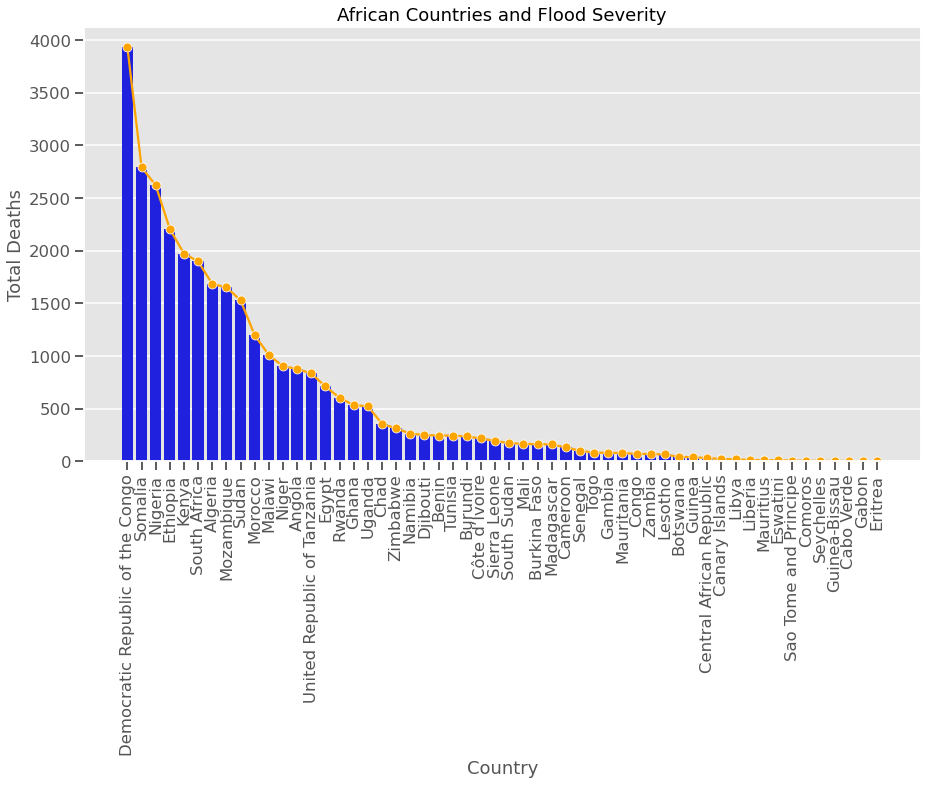

In [ ]:
style.use('ggplot')
sns.set_context('talk')
fig, ax = plt.subplots(figsize=(15,8))
severity = Africa_flood_sorted.groupby('Country', as_index=False).agg({'Total Deaths':'sum'})\
.sort_values(by='Total Deaths', ascending=False)
sns.barplot(data=severity, x='Country', y='Total Deaths', ax=ax, color='blue')\
.set(title='African Countries and Flood Severity')
sns.lineplot(x='Country', y='Total Deaths', data=severity, marker='o', color='orange', ax=ax)
plt.xticks(rotation=90)

#plt.savefig("flood_severity.png", dpi=500, bbox_inches="tight")
plt.show()

### What majors does OFDA apply/take to countries that accept their help and how much of the benefit is it in preventing or reducing flood

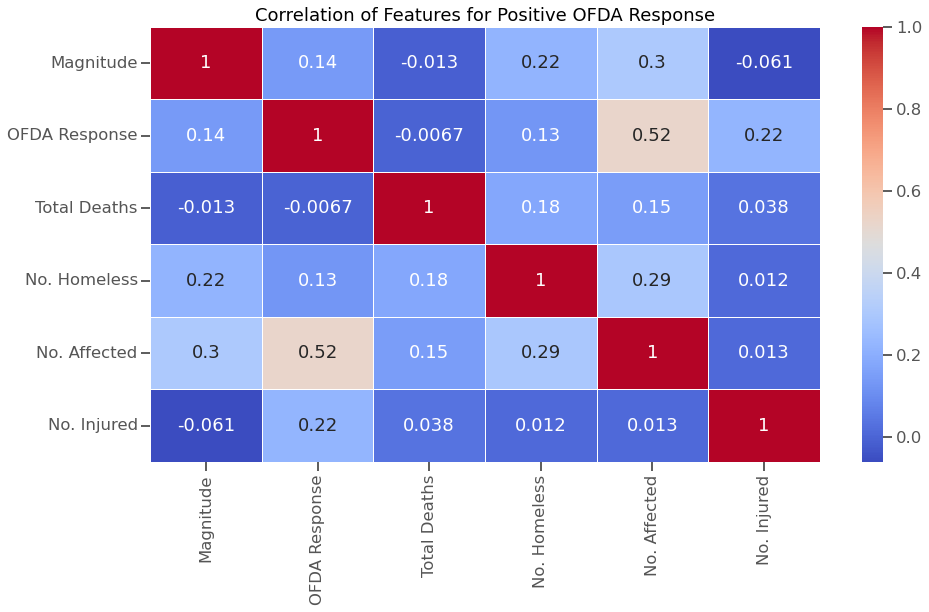

In [ ]:
correlation = Africa_flood_sorted[Africa_flood_sorted['OFDA Response'].isin(['Yes'])].groupby('Country', as_index=False)\
.agg({'Magnitude':'mean', 'OFDA Response':'count',
      'Total Deaths':'mean', 'Duration':'mean',
      'No. Homeless':'mean', 'No. Affected':'mean',
     'No. Injured':'mean'})\
.sort_values(by='Total Deaths', ascending=True)
fig, ax1 = plt.subplots(figsize=(15,8))
sns.heatmap(correlation.corr(), annot=True, cmap='coolwarm', cbar=True, linewidths=.5, ax=ax1)\
.set(title='Correlation of Features for Positive OFDA Response')
plt.savefig("corr.png", dpi=500, bbox_inches="tight")
plt.show()

In [ ]:
correlation

,Country,Magnitude,OFDA Response,Total Deaths,Duration,No. Homeless,No. Affected,No. Injured
31,South Sudan,212238.750000,1,0.000000,9 days 00:00:00,0.000000,290000.000000,0.000000
15,Gabon,0.000000,1,0.000000,9 days 00:00:00,0.000000,10000.000000,0.000000
7,Central African Republic,14811.715000,2,0.500000,8 days 12:00:00,12877.500000,978.500000,3.500000
3,Botswana,571700.000000,1,3.000000,9 days 00:00:00,32000.000000,106776.000000,0.000000
6,Cabo Verde,0.000000,1,3.000000,39 days 00:00:00,0.000000,150.000000,0.000000
9,Comoros,0.000000,2,3.000000,6 days 00:00:00,0.000000,33743.500000,75.000000
10,Congo,59411.625000,2,3.000000,11 days 12:00:00,2500.000000,8250.000000,0.000000
21,Mali,8.000000,5,3.200000,32 days 00:00:00,955.200000,17063.200000,3.400000
22,Mauritania,77672.457143,7,6.142857,11 days 00:00:00,6186.428571,7975.000000,0.000000
8,Chad,62323.586667,3,6.666667,31 days 00:00:00,15333.333333,241112.333333,0.000000


# Predictiing Flood Magnitude


Predicting flood magnitude is a crucial task with far-reaching implications for disaster management and response efforts. In this predictive model, we leverage key features to estimate flood magnitude accurately. The features we consider are:

1. **Duration:** The length of time a flood event persists is a significant factor in understanding its potential impact. Longer durations often correlate with more extensive flooding.

2. **No. Affected:** The number of people affected by the flood provides insights into the scale of the disaster. A higher number of affected individuals suggests a larger flood event.

3. **Total Deaths:** Tragically, the number of fatalities resulting from the flood is a vital indicator of its severity. Predicting this figure can aid in preparedness and response planning.

4. **Origin:** Understanding the geographic origin of the flood event helps in assessing its geographical extent and the regions likely to be impacted.

5. **OFDA Response:** The response of the Office of U.S. Foreign Disaster Assistance (OFDA) is an essential factor in disaster management. Their actions can influence the outcomes of flood events significantly.

By analyzing these features collectively, we aim to develop a robust predictive model that can estimate flood magnitude. This knowledge can be invaluable for authorities, emergency responders, and communities in implementing proactive measures to mitigate the impact of flooding and improve disaster response strategies. Our goal is to enhance disaster preparedness, response, and ultimately save lives in the face of natural disasters.

In [ ]:
# Developing feature and target variables
features = pd.get_dummies(Africa_flood_sorted[['Origin','No. Affected', 'Total Deaths', 'No. Homeless', 'No. Injured']])
#features['Duration'] = features['Duration'].astype('string').str.replace('days', '').astype('int')
target = Africa_flood_sorted['Magnitude']
display(features, target)

,No. Affected,Total Deaths,No. Homeless,No. Injured,"Origin_""Long Rains"" season",Origin_Brief torrential rain,Origin_Continuous rainfall and opening of Nagbéto dam in Togo,"Origin_Dam/Levy, break or release and heavy rains","Origin_Dam/levy, break or release",Origin_El NIno,...,Origin_Torrentital rain,Origin_Tropical Depression Rene,Origin_Tropical Storm named Ana,Origin_Tropical cyclone,Origin_Tropical depression/Cyclone Delfina,Origin_Tropical depression/cyclone Delfina,Origin_Unknown,Origin_West African Monsoon,Origin_heavy rain,Origin_heavy rains
273,0,104,185,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
275,30000,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
276,102000,25,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
281,0,43,0,50,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
282,20000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3090,468000,22,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3092,250,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3094,5680,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3097,24135,7,0,937,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


273     125814.24
275       1205.00
276       5345.89
281      86292.83
282     175880.71
          ...    
3090     61674.45
3092     60848.39
3094    157332.41
3097       112.50
3098     66101.20
Name: Magnitude, Length: 1145, dtype: float64

In [ ]:
# Generate X and y variables for Machine learning
X = features.values
y = target.values.reshape(1145,)

# Import necessary packages
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
# Split data into train and test set
SEED = 123
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

# Set pipeline steps
'''
step1 = [('scaler', StandardScaler()), ('dt', DecisionTreeRegressor(random_state=SEED))]
step2 = [('scaler', StandardScaler()), ('rf', RandomForestRegressor(random_state=SEED))]
step3 = [('scaler', StandardScaler()), ('lr', LinearRegression())]
step4 = [('scaler', StandardScaler()), ('gbt', GradientBoostingRegressor())]
'''
# Create pipeline
dt = DecisionTreeRegressor(random_state=SEED)
rf = RandomForestRegressor(random_state=SEED)

params_dt = {'max_depth':[3,4,5,6], 'min_samples_leaf':[0.04,0.06,0.08], 'max_features':[0.2,0.4,0.6,0.8]}
grid_dt = GridSearchCV(estimator=dt,
                   param_grid=params_dt,
                   scoring='neg_mean_squared_error',
                   cv=10,
                   n_jobs=-1)

params_rf = {'n_estimators':[300,400,500], 'max_depth':[4,6,8], 'min_samples_leaf':[0.1, 0.2], 'max_features':['log2', 'sqrt']}
grid_rf = GridSearchCV(estimator=rf,
                   param_grid=params_rf,
                   scoring='neg_mean_squared_error',
                   verbose=1,
                   cv=3,
                   n_jobs=-1)



# fit model
grid_dt.fit(X_train, y_train)
grid_rf.fit(X_train, y_train)
rf.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


RandomForestRegressor(random_state=123)

In [ ]:
# Predict values
y_dt_pred = grid_dt.predict(X_test)
y_rf_pred = rf.predict(X_test)

#Accuracy scores
accuracy1 = grid_dt.best_score_
accuracy2 = grid_rf.best_score_
accuracy3 = mean_squared_error(y_test, y_rf_pred, squared=False)
display(f'DecissionTree HPT Score: {np.sqrt(-accuracy1)}', f'RandomForest HPT Score: {np.sqrt(-accuracy2)}', f'RandomForest Score: {accuracy3}')

'DecissionTree HPT Score: 147218.10551651544'

'RandomForest HPT Score: 148834.10856275115'

'RandomForest Score: 106383.91299784929'

In [ ]:
rf.score(X_test, y_test)

0.0026029420677349258

In [ ]:
best_model_dt = grid_dt.best_estimator_
best_model_rf = grid_rf.best_estimator_

display(best_model_dt.score(X_test, y_test), best_model_rf.score(X_test, y_test))

-0.023911205764422405

0.009777355935518428